## Kelly's Advanced Lab Project ##


### Project Goals ###

* Review the literature on Virgo filaments - what has been done already?
* identify galaxies in the filaments surrounding the Virgo Cluster
    * this will require an analysis of their redshifts
* make a catalog that characterizes their
    * stellar mass
    * star formation rate from 22-micron WISE flux and GALEX UV flux
    * bulge-to-total ratio
    * disk scale length
* make a poster showing SDSS color images of filament galaxies
* compile other information on these galaxies that you will get from the literature
    * existing Halpha observations
    * radio observations
* compare galaxy properties to matched field and cluster samples
    * create a matched field sample
    * use Becky's Virgo cluster sample
* make a plot of SFR vs stellar mass for these galaxies in comparison to field and cluster samples.
* prepare proposal to get Halpha imaging of Virgo filament galaxies

### To do 9/26 ###

* get python 2 installed
* read in NSA catalog
* make a plot showing the region around Virgo, showing galaxies with:
    * raflag = (nsa.RA > 150.) & (nsa.RA < 220.) 
    * decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
    * velflag = (nsa.ZDIST*3.e5 > 1000.) & (nsa.ZDIST*3.e5 < 3000.)
    * vflag = raflag & decflag & velflag
* color-code points according to recession velocity


### To do 10/10 ###
* after we get Simard files:
     * Make plot of cluster, color coded by bulge to total ratio
     * make color-color plots of filaments, color coded by bulge to total ratio

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u

/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


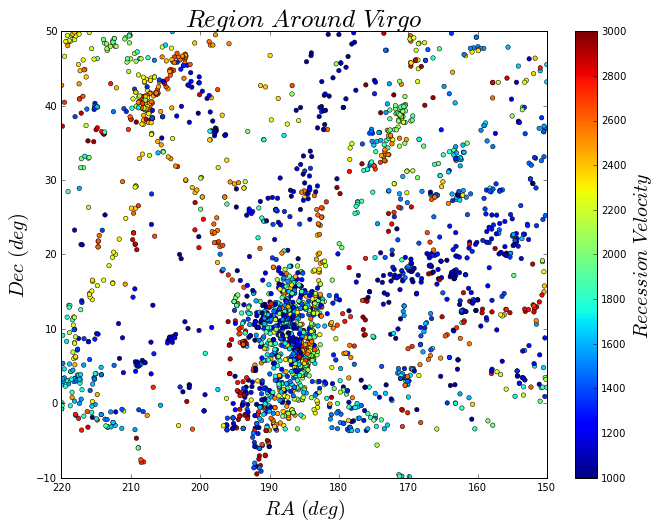

In [3]:
#Assignment from 9/26

#NSA Table
NSA_file = '/Users/kellywhalen/Github/Virgo/nsa_v0_1_2_with_AGC.Virgo.fits'
NSA = fits.getdata(NSA_file)

# read in WISE catalog
wisefile='/Users/kellywhalen/Github/Virgo/nsa_v0_1_2_wise.Virgo.fits'
wise=fits.getdata(wisefile)

#read in John's stellar masses
massfile='/Users/kellywhalen/Github/Virgo/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.Virgo.fits'
jmass=fits.getdata(massfile)

#Read in Simard Tables
simard1file = '/Users/kellywhalen/Github/Virgo/Simard1ToNSA.fits'
simard1 = fits.getdata(simard1file)

simard2file = '/Users/kellywhalen/Github/Virgo/Simard2ToNSA.fits'
simard2 = fits.getdata(simard1file)

simard3file = '/Users/kellywhalen/Github/Virgo/Simard3ToNSA.fits'
simard3 = fits.getdata(simard3file)


#set flags
raflag = (NSA.RA_1 > 150.) & (NSA.RA_1 < 220.)
decflag= (NSA.DEC_1 > -10.) & (NSA.DEC_1 < 50.)
velflag = (NSA.Z*3.e5 > 1000.) & (NSA.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag 


RA = NSA.RA_1
DEC = NSA.DEC_1
z = NSA.Z
rv = z*3.e5

plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)



/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


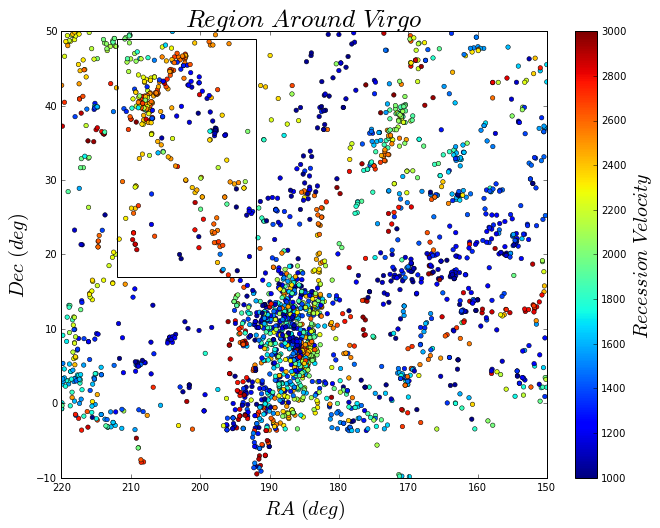

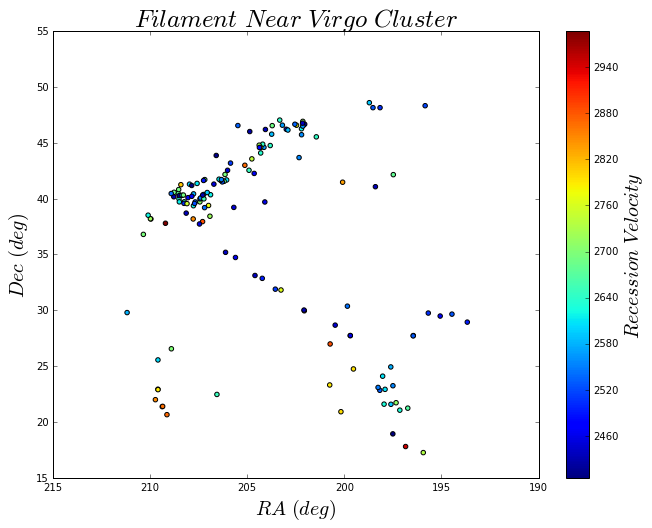

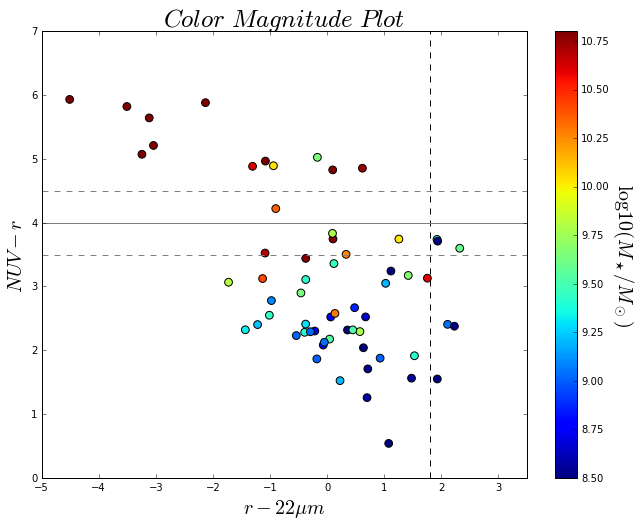

In [4]:
#Finding Galaxies in filaments
filRVFlag = (z*3.e5 < 3000.) & (z*3.e5 > 2400.)
filRAFlag = (RA > 192.) & (RA < 212.)
filDECFlag = (DEC > 17.) & (DEC < 49.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig1 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((192,17), 20, 32,fill=False, color='k')
fig1.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

plt.figure(figsize=(10,8))
plt.scatter(RA[filflag], DEC[filflag], c=z[filflag]*3.e5)
cb=plt.colorbar(fraction=.08)
plt.gca().invert_xaxis()
plt.title('$Filament \ Near \ Virgo \ Cluster$', fontsize=25)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
cb.set_label('$Recession \ Velocity$',size=20)

#Color-Color plot filament
#NUV-r
NSA.nsamag = 22.5-2.5*np.log10(NSA.NMGY)
NUVr = NSA.ABSMAG[:,1] - NSA.ABSMAG[:,4]
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.)

cflag =  wflag & filflag 

r22 = NSA.nsamag[:,4] - (wise.W4MPRO + 6.620) #convert to AB magnitude

#Define stellar mass
logstellarmass = jmass.MSTAR_50

plt.figure(figsize = (10,8))
plt.scatter(r22[cflag], NUVr[cflag], c=logstellarmass[cflag], s = 60, vmin = 8.5, vmax = 10.8)
cb = plt.colorbar(fraction = 0.08)
plt.axis([-5,3.5,0,7])
plt.xlabel('$r - 22\mu m$', fontsize=20)
plt.ylabel('$NUV-r$', fontsize=20)
plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
cb.ax.text(2.5, .5,'$\log{10}(M_\star/M_\odot)$', rotation = -90, verticalalignment = 'center', fontsize = 20)
plt.title('$Color \ Magnitude \ Plot$', fontsize = 25)



/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


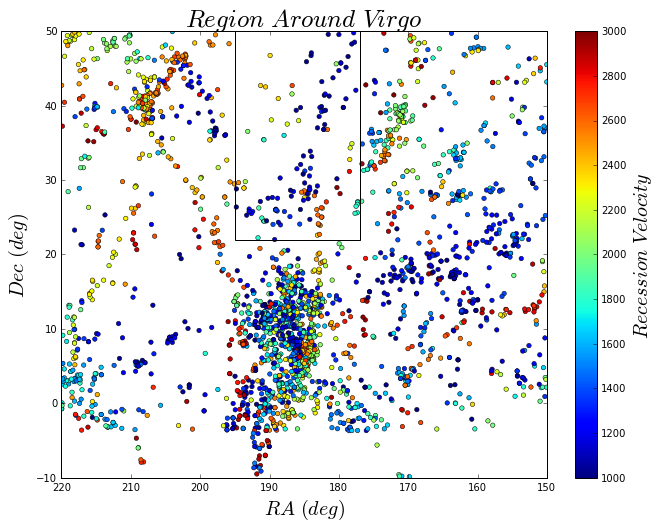

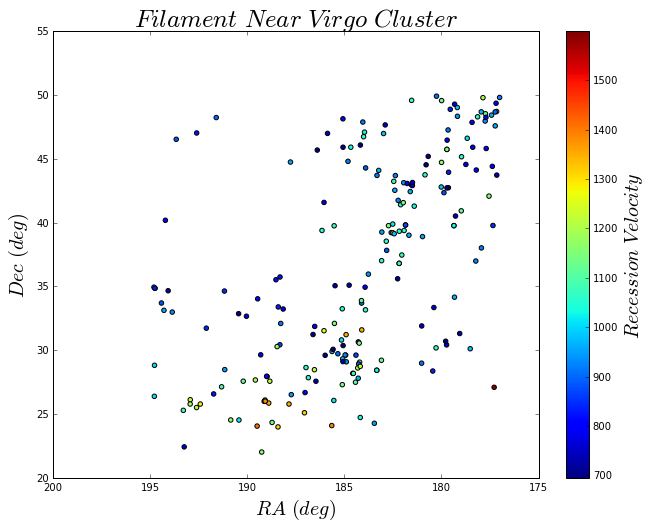

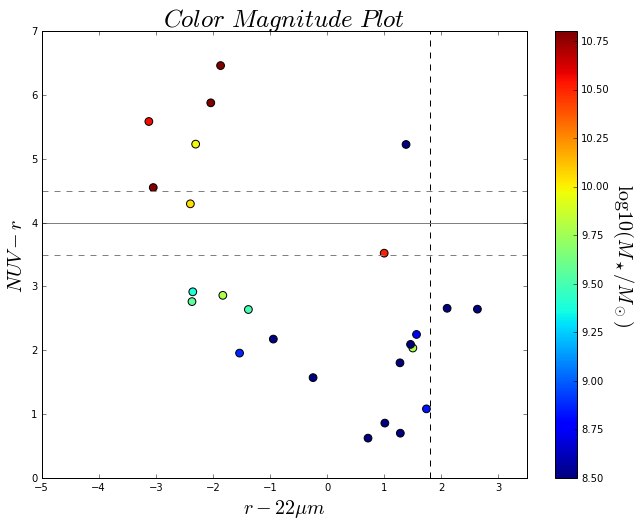

In [5]:
#Finding Galaxies in filaments
filRVFlag = (z*3.e5 < 1600.) #& (z*3.e5 > 2400.)
filRAFlag = (RA > 177.) & (RA < 195.)
filDECFlag = (DEC > 22.) & (DEC < 50.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig2 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((177,22), 18, 28,fill=False, color='k')
fig2.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

plt.figure(figsize=(10,8))
plt.scatter(RA[filflag], DEC[filflag], c=z[filflag]*3.e5)
cb=plt.colorbar(fraction=.08)
plt.gca().invert_xaxis()
plt.title('$Filament \ Near \ Virgo \ Cluster$', fontsize=25)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
cb.set_label('$Recession \ Velocity$',size=20)

#Color-Color plot filament
#NUV-r
NSA.nsamag = 22.5-2.5*np.log10(NSA.NMGY)
NUVr = NSA.ABSMAG[:,1] - NSA.ABSMAG[:,4]
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.)

cflag =  wflag & filflag 

r22 = NSA.nsamag[:,4] - (wise.W4MPRO + 6.620) #convert to AB magnitude

#Define stellar mass
logstellarmass = jmass.MSTAR_50

plt.figure(figsize = (10,8))
plt.scatter(r22[cflag], NUVr[cflag], c=logstellarmass[cflag], s = 60, vmin = 8.5, vmax = 10.8)
cb = plt.colorbar(fraction = 0.08)
plt.axis([-5,3.5,0,7])
plt.xlabel('$r - 22\mu m$', fontsize=20)
plt.ylabel('$NUV-r$', fontsize=20)
plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
cb.ax.text(2.5, .5,'$\log{10}(M_\star/M_\odot)$', rotation = -90, verticalalignment = 'center', fontsize = 20)
plt.title('$Color \ Magnitude \ Plot$', fontsize = 25)


/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


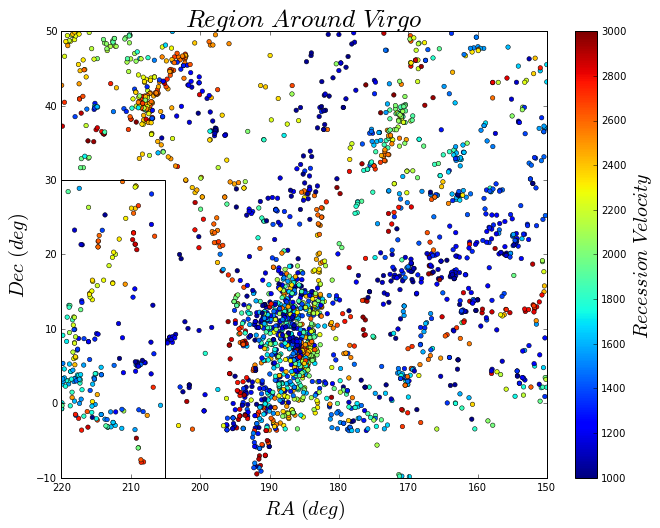

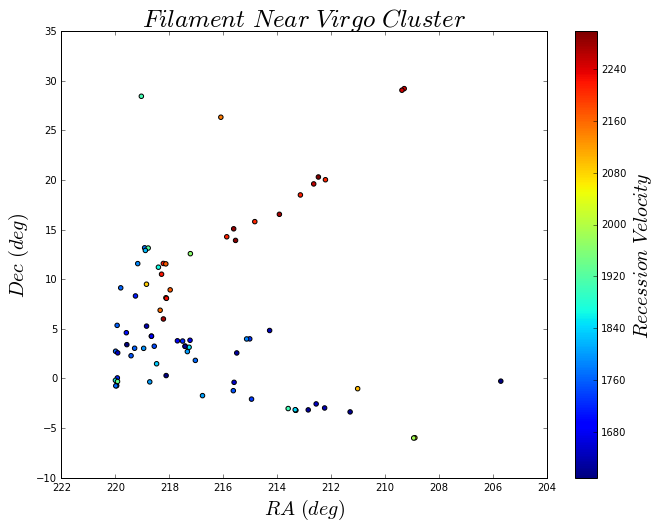

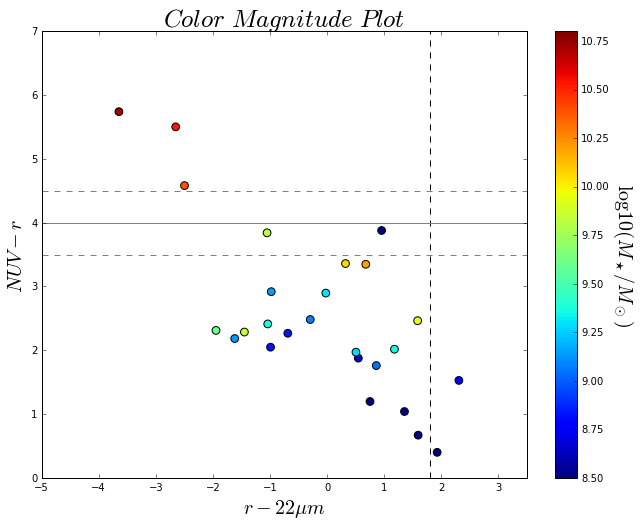

In [6]:
#Finding Galaxies in filaments
filRVFlag = (z*3.e5 > 1600.) & (z*3.e5 < 2300.)
filRAFlag = (RA > 205.) & (RA < 220.)
filDECFlag = (DEC > -10.) & (DEC < 30.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig3 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((205,-10), 15, 40,fill=False, color='k')
fig3.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

plt.figure(figsize=(10,8))
plt.scatter(RA[filflag], DEC[filflag], c=z[filflag]*3.e5)
cb=plt.colorbar(fraction=.08)
plt.gca().invert_xaxis()
plt.title('$Filament \ Near \ Virgo \ Cluster$', fontsize=25)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
cb.set_label('$Recession \ Velocity$',size=20)

#Color-Color plot filament
#NUV-r
NSA.nsamag = 22.5-2.5*np.log10(NSA.NMGY)
NUVr = NSA.ABSMAG[:,1] - NSA.ABSMAG[:,4]
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.)

cflag =  wflag & filflag 

r22 = NSA.nsamag[:,4] - (wise.W4MPRO + 6.620) #convert to AB magnitude

#Define stellar mass
logstellarmass = jmass.MSTAR_50

plt.figure(figsize = (10,8))
plt.scatter(r22[cflag], NUVr[cflag], c=logstellarmass[cflag], s = 60, vmin = 8.5, vmax = 10.8)
cb = plt.colorbar(fraction = 0.08)
plt.axis([-5,3.5,0,7])
plt.xlabel('$r - 22\mu m$', fontsize=20)
plt.ylabel('$NUV-r$', fontsize=20)
plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
cb.ax.text(2.5, .5,'$\log{10}(M_\star/M_\odot)$', rotation = -90, verticalalignment = 'center', fontsize = 20)
plt.title('$Color \ Magnitude \ Plot$', fontsize = 25)